In [1]:
import pandas as pd
import numpy as np
import os
import altair as alt
import glob
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## Read Files

In [10]:
directory = 'new_polymer_rheology/'

all_files = pd.DataFrame()
for filename in os.scandir(directory):
    if filename.is_file():
        df_sheets = pd.ExcelFile(filename.path)
        one_file = pd.DataFrame()
        for i in df_sheets.sheet_names:
            df = pd.DataFrame(df_sheets.parse(i, skiprows=2, usecols=range(2,10)))
            df = df[1:]
            df['sheet_temp'] = i
            one_file = one_file.append(df)
            #print(df.shape)
        one_file['file_name'] = filename.path
        #print(filename.path, one_file.shape)
        all_files = all_files.append(one_file)
        #print(filename, one_file.columns, all_files.shape)
all_files['pressure_ppm'] = all_files.file_name.str.split("/", expand = True)[1].str.split("_", expand = True)[1].str.split('ppm.xlsx', expand = True)[0]
all_files['pressure_ppm'] = pd.to_numeric(all_files['pressure_ppm'])
all_files['condition_temp'] = all_files.sheet_temp.str.split(" ", expand = True)[0]
all_files['condition_temp'] = pd.to_numeric(all_files['condition_temp'])
all_files['compound'] = all_files.file_name.str.split('/', expand = True)[1].str.split('Polymer ', expand = True)[1].str.split("_", expand = True)[0]
all_files['Stress'] = pd.to_numeric(all_files['Stress'])
all_files['Shear rate'] = pd.to_numeric(all_files['Shear rate'])
all_files['Viscosity'] = pd.to_numeric(all_files['Viscosity'])
all_files['Step time'] = pd.to_numeric(all_files['Step time'])
all_files['Temperature'] = pd.to_numeric(all_files['Temperature'])
all_files['Normal stress'] = pd.to_numeric(all_files['Normal stress'])


# = pd.to_numeric(all_files[["Stress", "Shear rate", "Viscosity", "Step time", "Temperature", "Normal stress"]])
all_files

Stress  Shear rate  Viscosity  Step time  Temperature  Normal stress  \
1   0.011794     1.00003   0.011794    39.9531       25.000       0.402864   
2   0.009812     1.25895   0.007793    80.0156       25.007       0.400730   
3   0.005531     1.58489   0.003490   120.1410       25.005       0.399841   
4   0.007154     1.99528   0.003585   160.1720       24.999       0.400784   
5   0.009642     2.51182   0.003839   200.3440       24.998       0.402165   
..       ...         ...        ...        ...          ...            ...   
26  1.372170   398.10700   0.003447  1083.1200       79.989       0.277452   
27  1.811600   501.18700   0.003615  1123.2500       79.995       0.272756   
28  2.389860   630.95800   0.003788  1163.7200       79.993       0.264701   
29  3.103090   794.32800   0.003907  1203.8300       79.983       0.247215   
30  4.066420  1000.00000   0.004066  1243.9500       79.998       0.222208   

   sheet_temp                                          file_name  \
1        25 C  new_polymer_rheology/Polymer DPTLB 2070 C_1000...   
2        25 C  new_polymer_rheology/Polymer DPTLB 2070 C_1000...   
3        25 C  new_polymer_rheology/Polymer DPTLB 2070 C_1000...   
4        25 C  new_polymer_rheology/Polymer DPTLB 2070 C_1000...   
5        25 C  new_polymer_rheology/Polymer DPTLB 2070 C_1000...   
..        ...                                                ...   
26       80 C     new_polymer_rheology/Polymer SAV10_600ppm.xlsx   
27       80 C     new_polymer_rheology/Polymer SAV10_600ppm.xlsx   
28       80 C     new_polymer_rheology/Polymer SAV10_600ppm.xlsx   
29       80 C     new_polymer_rheology/Polymer SAV10_600ppm.xlsx   
30       80 C     new_polymer_rheology/Polymer SAV10_600ppm.xlsx   

    pressure_ppm  condition_temp      compound  
1           1000              25  DPTLB 2070 C  
2           1000              25  DPTLB 2070 C  
3           1000              25  DPTLB 2070 C  
4           1000              25  DPTLB 2070 C  
5           1000              25  DPTLB 2070 C  
..           ...             ...           ...  
26           600              80         SAV10  
27           600              80         SAV10  
28           600              80         SAV10  
29           600              80         SAV10  
30           600              80         SAV10  

[3717 rows x 11 columns]

## Check for null values

In [11]:
all_files.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3717 entries, 1 to 30
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Stress          3717 non-null   float64
 1   Shear rate      3717 non-null   float64
 2   Viscosity       3717 non-null   float64
 3   Step time       3717 non-null   float64
 4   Temperature     3717 non-null   float64
 5   Normal stress   3717 non-null   float64
 6   sheet_temp      3717 non-null   object 
 7   file_name       3717 non-null   object 
 8   pressure_ppm    3717 non-null   int64  
 9   condition_temp  3717 non-null   int64  
 10  compound        3717 non-null   object 
dtypes: float64(6), int64(2), object(3)
memory usage: 348.5+ KB


In [5]:
all_files.isnull().sum()

Stress            0
Shear rate        0
Viscosity         0
Step time         0
Temperature       0
Normal stress     0
sheet_temp        0
file_name         0
pressure_ppm      0
condition_temp    0
compound          0
dtype: int64

## Write file

In [6]:
all_files.to_csv('clean/input.csv')

## EDA

In [7]:
all_files

Stress Shear rate   Viscosity Step time Temperature Normal stress  \
1    0.0117943    1.00003   0.0117939   39.9531          25      0.402864   
2   0.00981155    1.25895  0.00779344   80.0156      25.007       0.40073   
3   0.00553111    1.58489   0.0034899   120.141      25.005      0.399841   
4   0.00715404    1.99528  0.00358549   160.172      24.999      0.400784   
5   0.00964187    2.51182  0.00383859   200.344      24.998      0.402165   
..         ...        ...         ...       ...         ...           ...   
26     1.37217    398.107  0.00344673   1083.12      79.989      0.277452   
27      1.8116    501.187  0.00361462   1123.25      79.995      0.272756   
28     2.38986    630.958  0.00378766   1163.72      79.993      0.264701   
29     3.10309    794.328  0.00390656   1203.83      79.983      0.247215   
30     4.06642       1000  0.00406642   1243.95      79.998      0.222208   

   sheet_temp                                          file_name  \
1        25 C  new_polymer_rheology/Polymer DPTLB 2070 C_1000...   
2        25 C  new_polymer_rheology/Polymer DPTLB 2070 C_1000...   
3        25 C  new_polymer_rheology/Polymer DPTLB 2070 C_1000...   
4        25 C  new_polymer_rheology/Polymer DPTLB 2070 C_1000...   
5        25 C  new_polymer_rheology/Polymer DPTLB 2070 C_1000...   
..        ...                                                ...   
26       80 C     new_polymer_rheology/Polymer SAV10_600ppm.xlsx   
27       80 C     new_polymer_rheology/Polymer SAV10_600ppm.xlsx   
28       80 C     new_polymer_rheology/Polymer SAV10_600ppm.xlsx   
29       80 C     new_polymer_rheology/Polymer SAV10_600ppm.xlsx   
30       80 C     new_polymer_rheology/Polymer SAV10_600ppm.xlsx   

    pressure_ppm  condition_temp      compound  
1           1000              25  DPTLB 2070 C  
2           1000              25  DPTLB 2070 C  
3           1000              25  DPTLB 2070 C  
4           1000              25  DPTLB 2070 C  
5           1000              25  DPTLB 2070 C  
..           ...             ...           ...  
26           600              80         SAV10  
27           600              80         SAV10  
28           600              80         SAV10  
29           600              80         SAV10  
30           600              80         SAV10  

[3717 rows x 11 columns]

In [14]:
corr = all_files.corr()
corr.style.background_gradient(cmap='coolwarm')

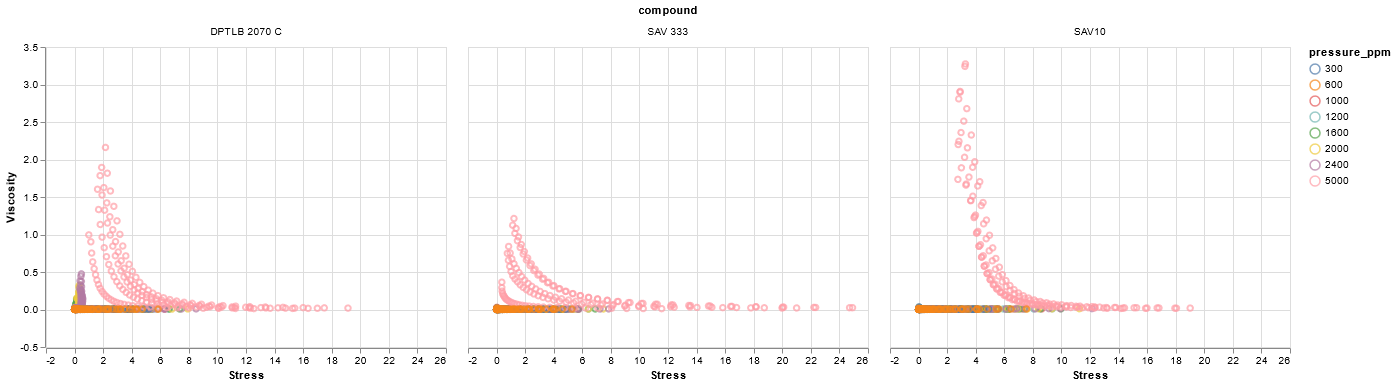

In [29]:
alt.Chart(all_files).mark_point().encode(
    alt.X('Stress'),
    alt.Y('Viscosity'),
    alt.Facet('compound'),
    alt.Color('pressure_ppm:N')).properties(width = 400).interactive()

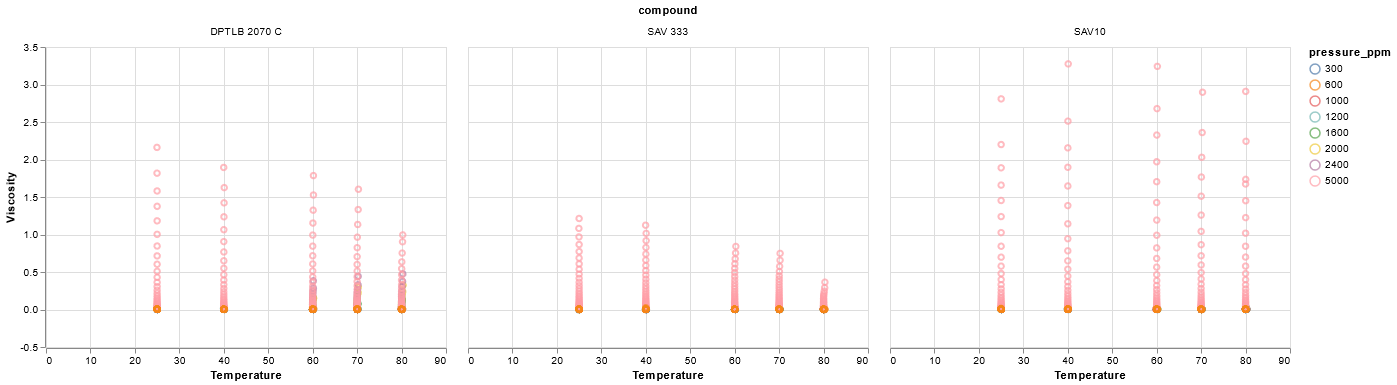

In [27]:
alt.Chart(all_files).mark_point().encode(
    alt.X('Temperature'),
    alt.Y('Viscosity'),
    alt.Facet('compound'),
    alt.Color('pressure_ppm:N')).properties(width = 400)

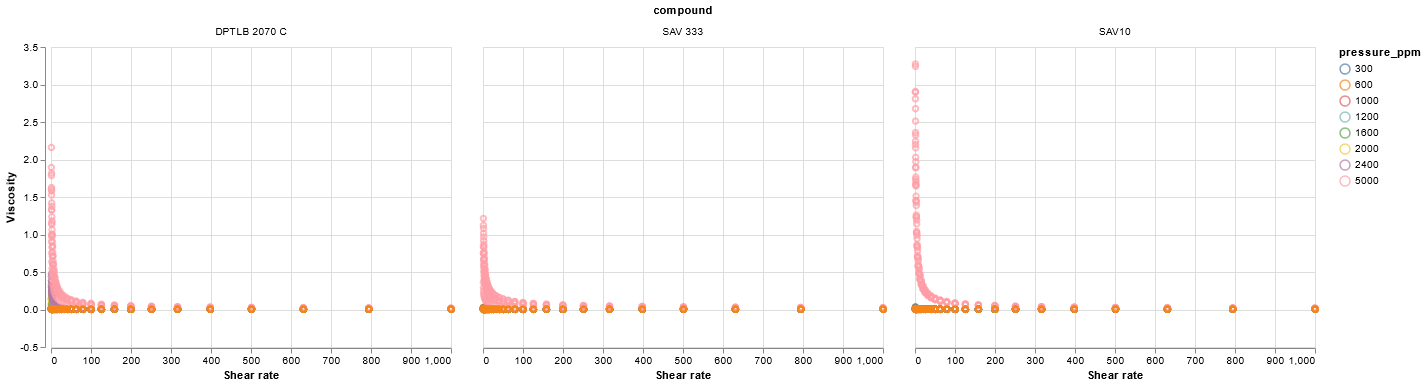

In [28]:
alt.Chart(all_files).mark_point().encode(
    alt.X('Shear rate'),
    alt.Y('Viscosity'),
    alt.Facet('compound'),
    alt.Color('pressure_ppm:N')).properties(width = 400)

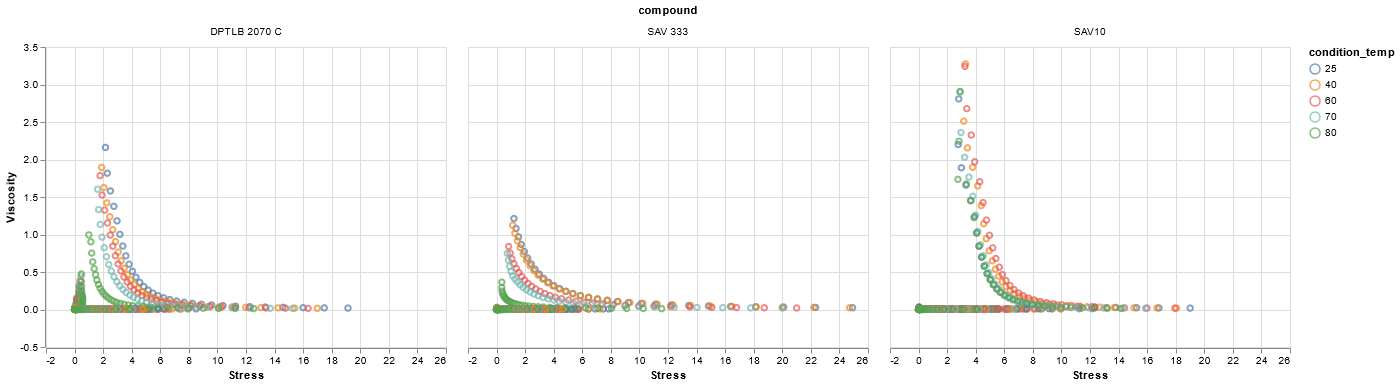

In [31]:
alt.Chart(all_files).mark_point().encode(
    alt.X('Stress'),
    alt.Y('Viscosity'),
    alt.Facet('compound'),
    alt.Color('condition_temp:N')).properties(width = 400).interactive()